# Convolutional Neural Network.
## Instructions and Requirements:
This week workshop will have two sections:

*   Section: 1
  *   In this section, we will implement and observe the operations of various layers used to build the CNN.
  *   By the end of the workshop, we expect you to be able to:
      1.   Explain the Convolution operation
      2.   Explain the pooling operation
      3.   Get familiar with various hyperparameters i.e. stride, padding

*   Section: 2
  *   In this section we will compile all the learning from section 1 to build a basic Convolutional Neural Network using Keras and Tensorflow.
  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Convolution Summary:

We convolve (slide) a small matrix also known as Filter/kernel, performing element wise matrix multiplications to produce filter-map.

  *   Objective of a convolution operations:
        1.   Apply a set of weights-a filter- to extract local features.
        2.   Use Multiple filters to extract different features.
        3.   Spatially share parameters of each filter.

Mathematically it perform following:
$$ conv(I,K)_{xy} = ∑_{i=1}^{h}\sum_{j=1}^{w}K_{ij}.I_{x+i-1,y+j-1} \tag{1} $$

Where:
- $I$ input image matrix..
-$K$ kernel/Filter used to perform convolution.

Hyper-parameters in Convolution Operations:
*   Number of Filters(K)
*   Size of Filters(F)
*   Stride(S)
*   amount of zero padding(P)

Output Dimensions is given by:

\begin{align}
\mathbf{O}  = \frac{W_{in} -f + 2p}{s} + 1 \tag{2}
\end{align}

### Exercise-1.

Perform following Convolution Operations:

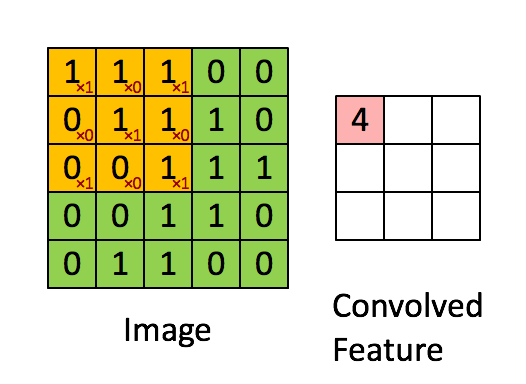

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [ ]:
# Defining the input matrix as above using np.array function.
I = np.array([[1, 1, 1, 0, 0], [0, 1, 1, 1 ,0], [0, 0, 1, 1, 1,], [0, 0, 1, 1, 0], [0, 1, 1, 0, 0]])

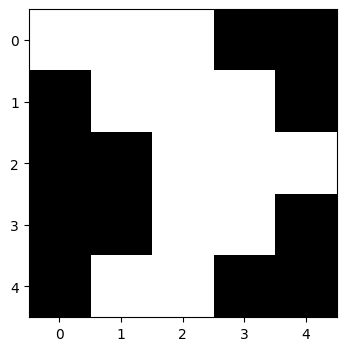

In [ ]:
# Visualizing the input.
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(I)

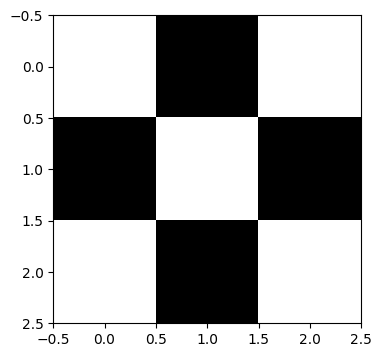

In [ ]:
# Defining the input matrix as above using np.matrix function.
K = np.array([[1, 0, 1], [0, 1, 0], [1, 0, 1]])
# Visualizing the Filter.
plt.imshow(K)


In [ ]:
import numpy as np

def convolution(img, filter):
    """
    Function performs convolution operations.

    Arguments:
    img (nd array): numpy array of an input image.
    filter (nd array): numpy array of an input filter.

    Output:
    Filter_Map of dimensions specified by eq(2) [i.e., valid convolution result].
    """
    img_height, img_width = img.shape
    filter_height, filter_width = filter.shape

    output_dimension = img_height - filter_height + 1  # Assuming square input and filter
    filter_map = np.zeros((output_dimension, output_dimension))

    for i in range(output_dimension):
        for j in range(output_dimension):
            region = img[i:i+filter_height, j:j+filter_width]
            filter_map[i, j] = np.sum(region * filter)

    return filter_map



In [ ]:
img = convolution(I, K)

In [ ]:
assert img.shape == (3, 3), " Convolution Operation did not produce correct output"

Test Passed


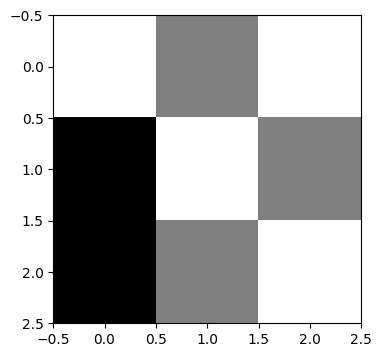

In [ ]:
plt.imshow(img)
print("Test Passed")

# Section-2: In this section we will build very basic CNN architecture, Compile and train our CNN model.

This will be further divided into following sections:


## Section-2.1: Data Pre-processing.

Expected structure of folder:

-/Datasets/

      --train/
        -- acai/....     
        -- cupuacu/---
        -- all the classes--

In [ ]:
data_dir = "/content/drive/MyDrive/AI and ML/FruitinAmazon"

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
# Hyper-parameters:
batch_size = 32
img_height = 180
img_width = 180

### Load the Data:

We will use tf.keras.utility to load the image, for this function to work, your data should be in the structure suggested above.

We will do this for both training and validation dataset.

### Exercise:

1. To train a deep learning model we need to create a data pipeline, Multiple different approaches are available within keras framework;
one such framework is
  "tf.keras.utils.image_dataset_from_directory("parameter")

Implement above framework and explain the parameters you have used in the comment.

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/AI and ML/FruitinAmazon/FruitinAmazon/train',
    labels='inferred',             # Automatically infers class labels from subdirectory names
    label_mode='categorical',      # Labels are returned as one-hot encoded vectors. You can also use 'int' or 'binary'
    batch_size=32,                 # Number of samples per batch
    image_size=(224, 224),         # Resizes all images to the given size (height, width)
    shuffle=True,                  # Shuffles the dataset
    seed=123                       # Seed for reproducibility
)


Found 90 files belonging to 6 classes.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
   '/content/drive/MyDrive/AI and ML/FruitinAmazon/FruitinAmazon/train',
    labels='inferred',
    label_mode='categorical',
    validation_split=0.2,          # 20% of the dataset used for validation
    subset='validation',           # Specifies this as the validation subset
    seed=123,                      # Same seed used for splitting the dataset
    image_size=(224, 224),         # Resize images to 224x224
    batch_size=32                  # Batch size of 32
)


Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [ ]:
# Printing out number of Classes
class_names = train_ds.class_names
print(class_names)

['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


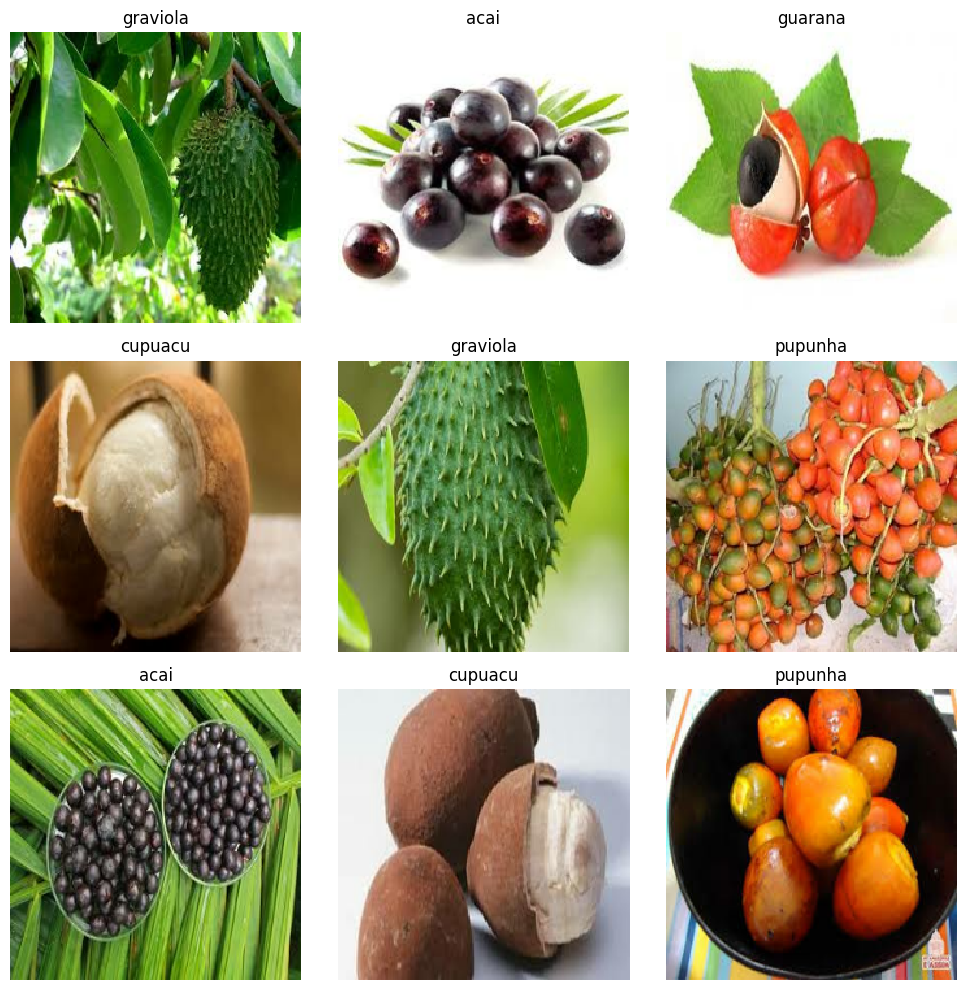

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Manually defined class names
class_names = ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']

# Plot 9 sample images from the training dataset
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        class_index = labels[i].numpy().argmax()  # For categorical labels
        plt.title(class_names[class_index])
        plt.axis("off")
plt.tight_layout()
plt.show()


In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32, 6)


## Design CNN Architecture:

For this task, we will build a CNN with following layers:

Feature-Extraction and Convolution Operations.
1.   Convolutional Layer [F=(3,3),K=16,P="same",S=1]-> Activation["ReLU"].
2.   Pooling layer[max, F=(2,2), S=2].
3.   Convolutional Layer [F=(3,3),K=16,P="same",S=1]-> Activation["ReLU"].
4.   Pooling layer[max, F=(2,2), S=2].

Classification-Assigning a class probabilities to each classes.
1.   Flatten Layer()
2.   Hidden/Dense Layer [number of neurons=128].
3.   Output Layer [number of neurons=num_classes].


### Exercise:

Please fill the hyper-parameters as defined above in the below layers.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

def generate_model(image_height, image_width, nchannels, num_classes):
    """
    This function will generate a CNN model.

    Input Args:
    image_height [int]  : Height of an image.
    image_width [int]   : Width of an image.
    nchannels [int]     : Number of channels in the image (e.g., 3 for RGB).
    num_classes [int]   : Number of output classes.

    Output:
    model -> A compiled CNN model.
    """
    model = tf.keras.Sequential([
        # Normalize pixel values
        layers.Rescaling(1./255, input_shape=(image_height, image_width, nchannels)),

        # First Block
        layers.Conv2D(32, (3, 3), activation='relu'),  # 32 filters, 3x3 kernel
        layers.MaxPooling2D(pool_size=(2, 2)),

        # Second Block
        layers.Conv2D(64, (3, 3), activation='relu'),  # 64 filters, 3x3 kernel
        layers.MaxPooling2D(pool_size=(2, 2)),

        # Classifier
        layers.Flatten(),
        layers.Dense(128, activation='relu'),          # Fully connected layer with 128 units
        layers.Dense(num_classes, activation='softmax') # Output layer with softmax for multi-class
    ])

    return model


img_height = 180
img_width = 180

In [ ]:
num_classes = len(class_names)
model = generate_model(img_height, img_width, 3, num_classes)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 118336)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      15,147,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,167,302 (57.86 MB)

 Trainable params: 15,167,302 (57.86 MB)

 Non-trainable params: 0 (0.00 B)

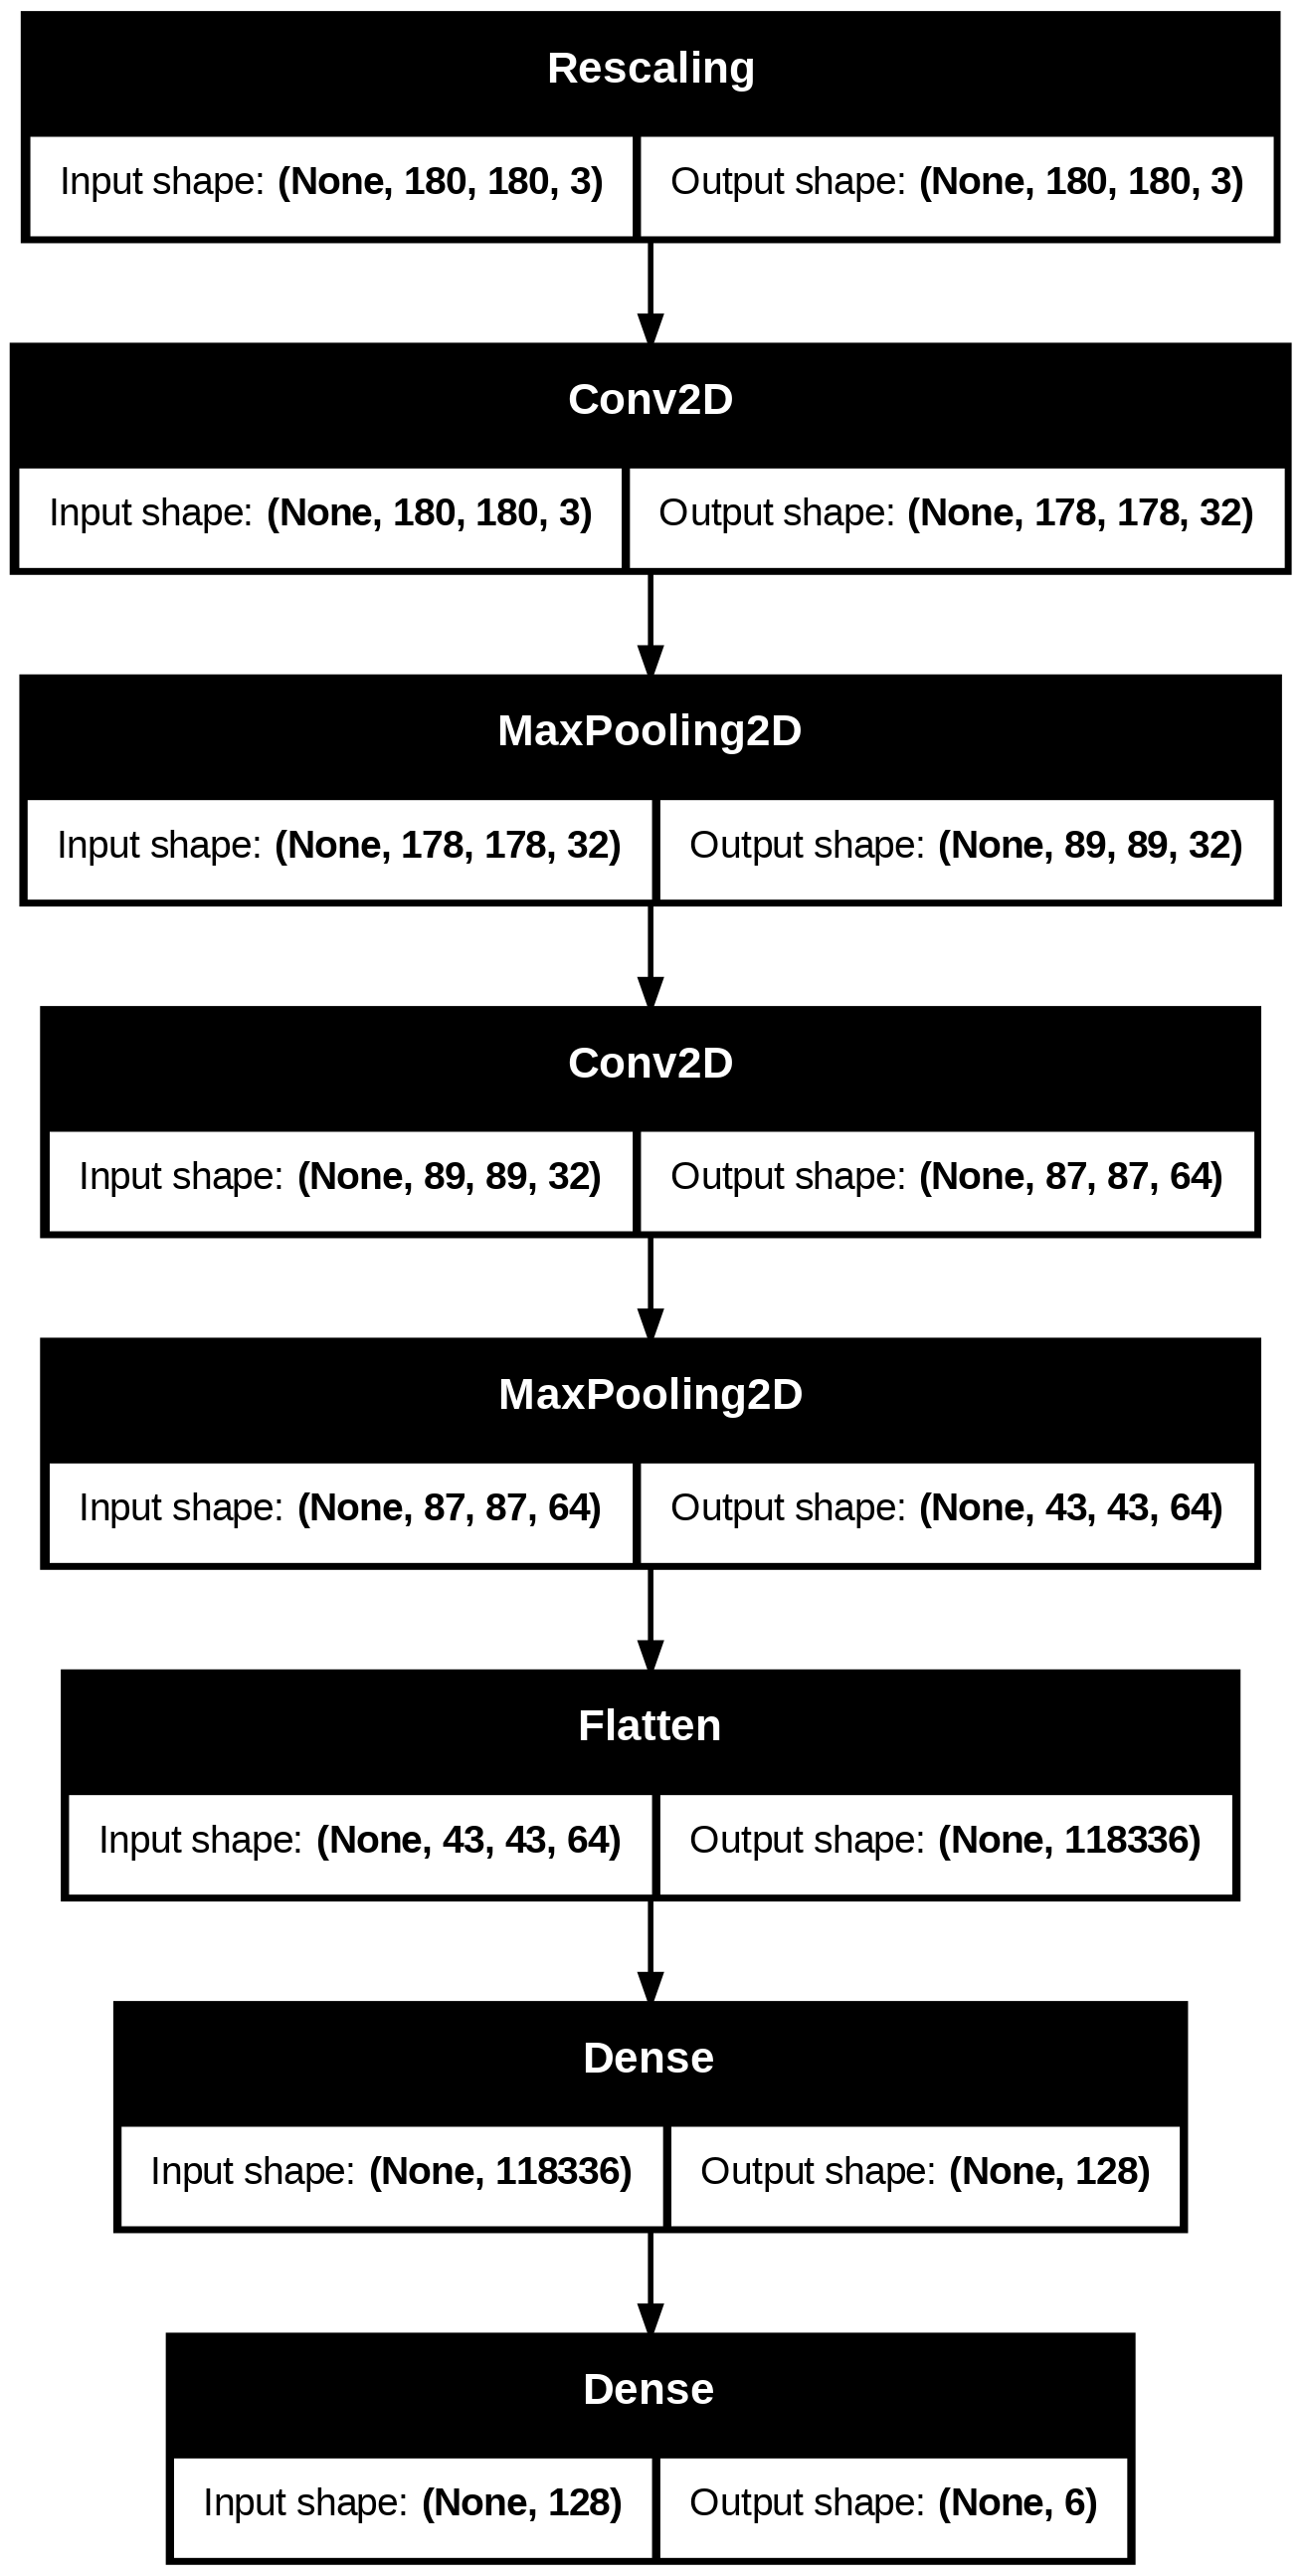

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

## Compile and Train Model.

Once we built the model, we need to compile the model before we start training.

In Model compilation, we do the following:
*   Checks for format Error.
*   Defines the loss function.
*   Defines the optimizer.
*   Defines the learning rate.
*   Defines the metrics we will be using.

For training our model we will be using:
*   loss --> SparseCategoricalCrossEntropy.
*   Optimizer --> Adam.
*   Evaluation Metric --> Accuracy.


In [ ]:
model.compile(
    optimizer='adam',                        # Optimizer for training
    loss='categorical_crossentropy',         # Loss function for one-hot encoded multi-class labels
    metrics=['accuracy']                     # Metric to evaluate during training/validation
)



### Train the Model.

For training a model with all the given hyper-parameters, and argumets we invoke fit methods.

It is a standard practise to return and hold record of losses values and metric values during training in variablel-history.

In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/AI and ML/FruitinAmazon/FruitinAmazon'
    ,
    labels='inferred',
    label_mode='categorical',
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(180, 180),     # <-- Match this to model input
    batch_size=32
)

Found 120 files belonging to 2 classes.
Using 24 files for validation.


## Home Task:

Create a Test Set and Perform a model evaluation to find the test accuracy.

Based on last week built a function which predicts input examples, and also plot the result.


In [ ]:
import tensorflow as tf
test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/AI and ML/FruitinAmazon/FruitinAmazon/test",
    image_size=(180, 180),
    batch_size=32,
    label_mode="categorical"
)


Found 30 files belonging to 6 classes.


In [ ]:
import tensorflow as tf

# Define the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(6, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Now you can evaluate the model
test_loss, test_accuracy = model.evaluate(test_ds)
print(f" Test Accuracy: {test_accuracy:.2%}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.1333 - loss: 32.5417
 Test Accuracy: 13.33%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def predict_and_plot(model, dataset, class_names):
    plt.figure(figsize=(12, 12))
    for images, labels in dataset.take(1):  # Get one batch
        predictions = model.predict(images)
        for i in range(9):  # Show first 9 images
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))

            true_label = class_names[np.argmax(labels[i])]
            predicted_label = class_names[np.argmax(predictions[i])]

            color = "green" if predicted_label == true_label else "red"
            plt.title(f"Pred: {predicted_label}\nTrue: {true_label}", color=color)
            plt.axis("off")
    plt.tight_layout()
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step


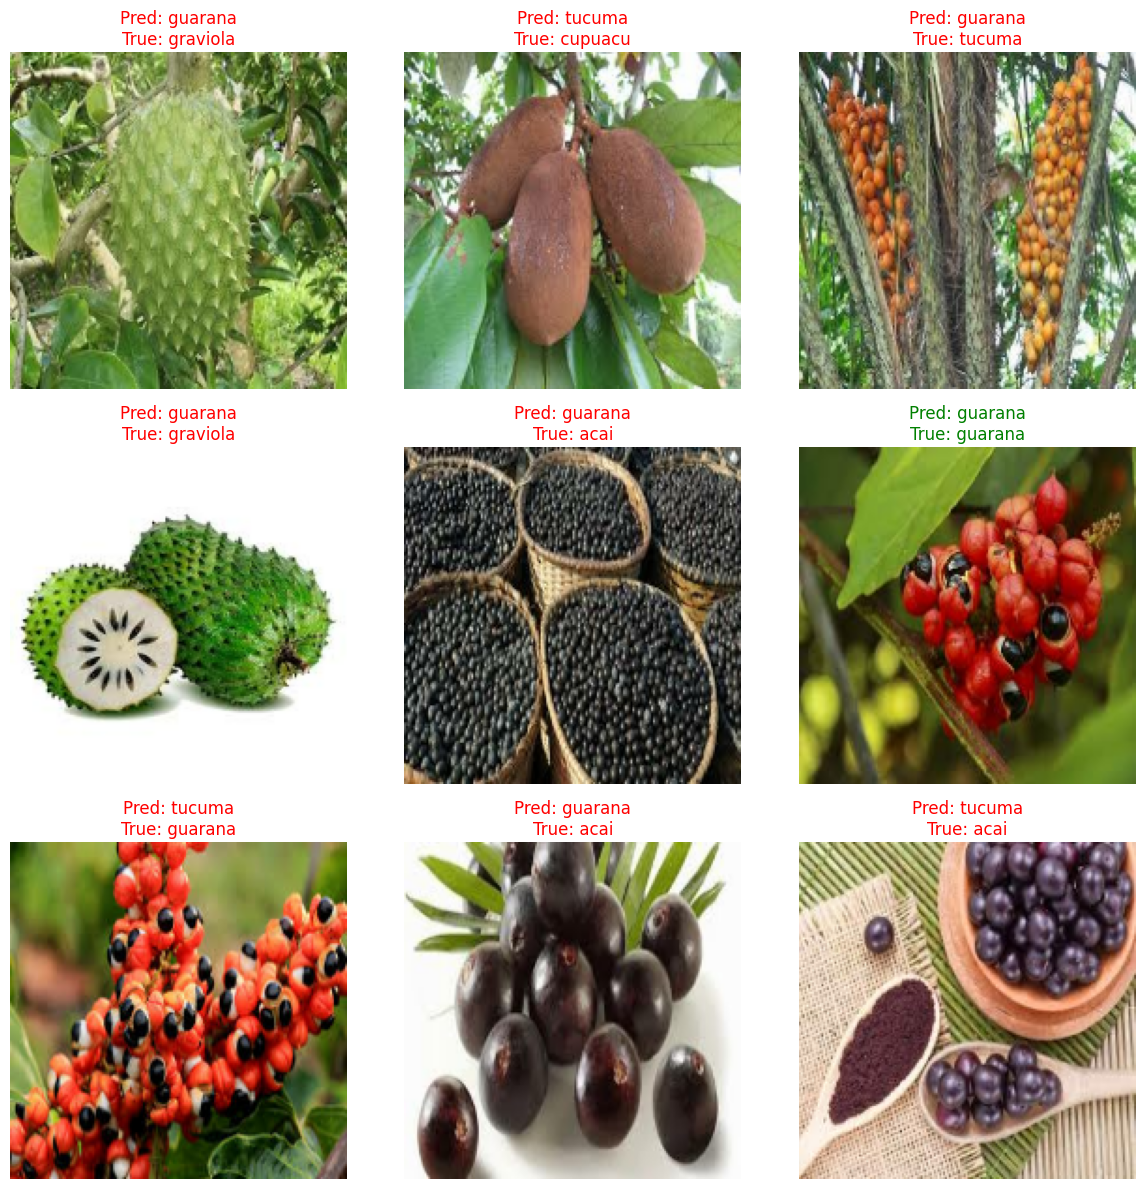

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf # Import tensorflow if not already imported

def predict_and_plot(model, dataset, class_names):
    plt.figure(figsize=(12, 12))
    for images, labels in dataset.take(1):  # Get one batch
        predictions = model.predict(images)
        for i in range(9):  # Show first 9 images
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))

            true_label = class_names[np.argmax(labels[i])]
            predicted_label = class_names[np.argmax(predictions[i])]

            color = "green" if predicted_label == true_label else "red"
            plt.title(f"Pred: {predicted_label}\nTrue: {true_label}", color=color)
            plt.axis("off")
    plt.tight_layout()
    plt.show()

# Get class names from the test dataset
class_names = test_ds.class_names

# Now call the function with class_names
predict_and_plot(model, test_ds, class_names)